Create heatmaps of ticket concentration by region

Calculate Ticket Count by Country

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("technical_support_with_clusters.csv")

ticket_count_country = df.groupby('Country').size().sort_values(ascending=False)
ticket_count_country


,0
Country,
Germany,306
Italy,303
Poland,287
United Kingdom,283
Slovenia,159
France,158
Republic of Ireland,148
Austria,144
Greece,144


Bar Chart – Ticket Count by Country

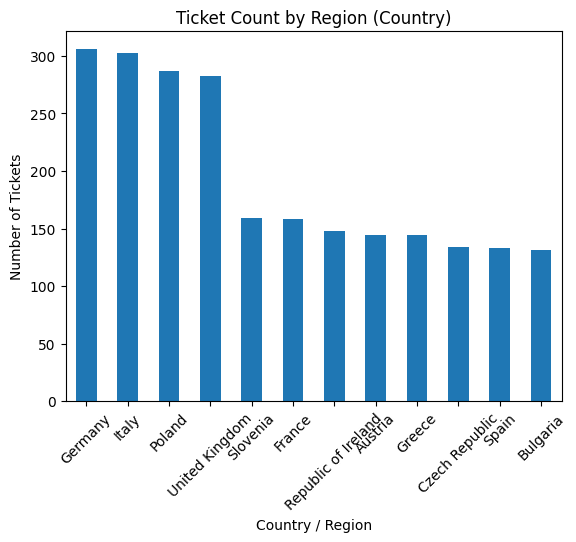

In [3]:
plt.figure()
ticket_count_country.plot(kind='bar')
plt.xlabel("Country / Region")
plt.ylabel("Number of Tickets")
plt.title("Ticket Count by Region (Country)")
plt.xticks(rotation=45)
plt.show()


Heatmap – Ticket Concentration by Country

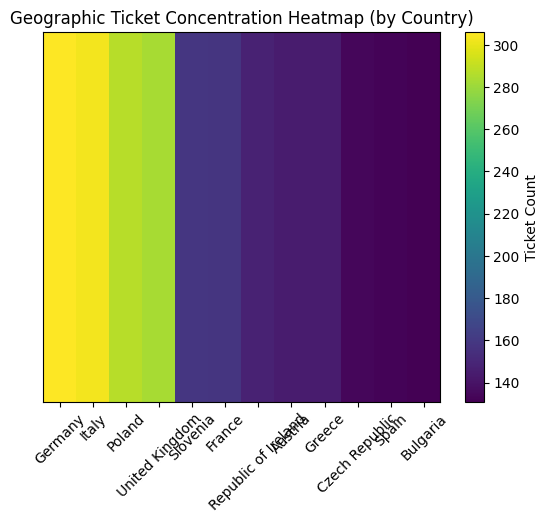

In [5]:
import numpy as np

# Convert counts to a matrix form
heatmap_data = np.array(ticket_count_country).reshape(1, -1)

plt.figure()
plt.imshow(heatmap_data, aspect='auto')
plt.colorbar(label="Ticket Count")
plt.yticks([])
plt.xticks(range(len(ticket_count_country.index)), ticket_count_country.index, rotation=45)
plt.title("Geographic Ticket Concentration Heatmap (by Country)")
plt.show()


Map issue categories geographically using latitude/longitude

In [ ]:
df['Category_Code'] = df['category'].astype('category').cat.codes


Scatter Map: Issue Categories by Location

In [ ]:
category_mapping = dict(
    enumerate(df['category'].astype('category').cat.categories)
)
category_mapping


{0: 'Bug report',
 1: 'Feature request',
 2: 'Other',
 3: 'Pricing and Licensing',
 4: 'Pricing and licensing',
 5: 'Product setup',
 6: 'Purchasing and invoicing',
 7: 'Training request'}

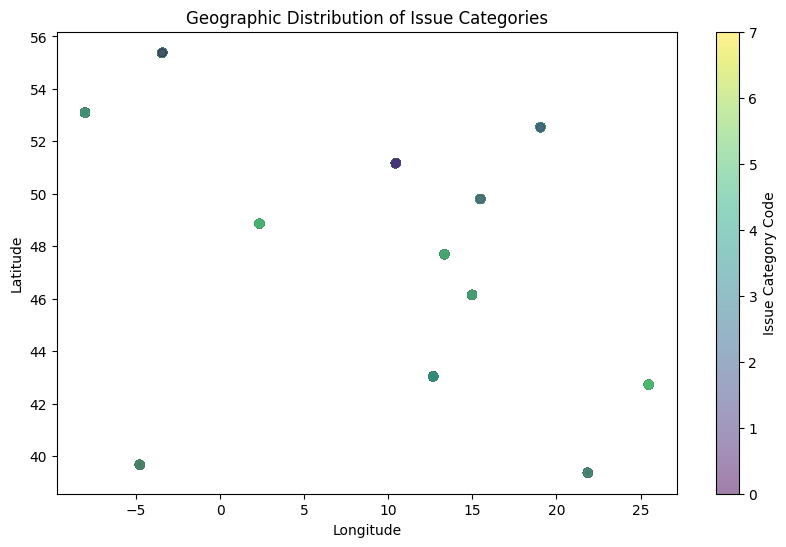

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=df['Category_Code'],
    alpha=0.5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Issue Categories")
plt.colorbar(label="Issue Category Code")
plt.show()


Color of the dot
Represents the issue category (encoded as a number).

Different colors = different issue categories

The color bar on the right shows category codes.

Evaluate the relationship between cluster size and performance score

Calculate Cluster Size & Performance

In [ ]:
cluster_summary = df.groupby('Cluster').agg(
    Cluster_Size=('Cluster', 'count'),
    Avg_Resolution_Time=('Resolution_Duration', 'mean')
)

cluster_summary


,Cluster_Size,Avg_Resolution_Time
Cluster,,
0,1077,22135.569919
1,804,22290.260842
2,449,21769.738878


Bar Chart – Cluster vs Average Resolution Time

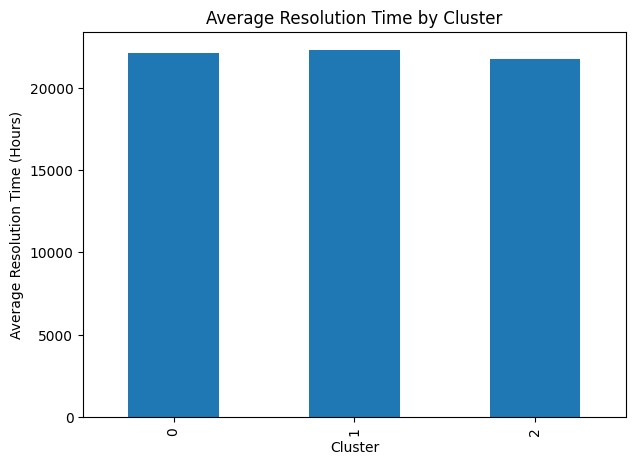

In [ ]:
plt.figure(figsize=(7,5))
cluster_summary['Avg_Resolution_Time'].plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("Average Resolution Time by Cluster")
plt.show()
